In [17]:
import numpy as np
import matplotlib.pyplot as plt
import json



In [18]:
def convert_bytes(size):
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024.0:
            return "%3.2f %s" % (size, x)
        size /= 1000.0

    return size

In [19]:
with open('./callback_unet_memory_full.json', 'r') as f:
    js = json.load(f)

In [20]:
for i in list(js.keys())[:-2]:
    txt = i +' : '
    for k in list(js[i]):
        txt += k + ' : ' + convert_bytes(js[i][k]) + ' | '
    print(txt)

model : max : 380.51 MB | cur : 380.51 MB | 
input : max : 381.33 MB | cur : 381.33 MB | 
output : max : 392.80 MB | cur : 392.80 MB | 
forward : max : 1.07 GB | cur : 931.03 MB | 
loss : max : 1.07 GB | cur : 931.05 MB | 
backward : max : 1.13 GB | cur : 759.48 MB | 
step : max : 1.13 GB | cur : 759.48 MB | 


In [21]:
f_cur, f_max, b_cur, b_max = [], [], [], []
for fk, bk in zip(js['hookF'], js['hookB']):
    f_cur.append(fk['cur'][0])
    f_max.append(fk['max'][0])
    b_cur.append(bk['cur'][0])
    b_max.append(bk['max'][0])

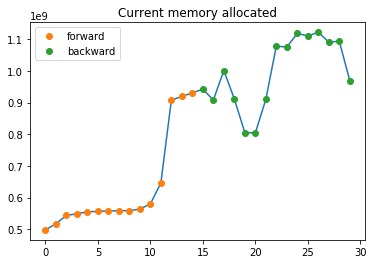

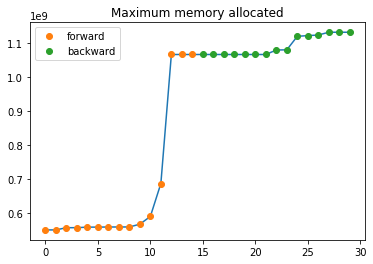

In [22]:
x1, x2 = list(range(len(f_cur))), list(range(len(f_cur),len(f_cur)+len(b_cur)))
plt.plot(x1+x2,f_cur + list(reversed(b_cur)))
plt.plot(x1,f_cur, 'o', label = 'forward')
plt.plot(x2,list(reversed(b_cur)), 'o', label = 'backward')
plt.legend()
plt.title('Current memory allocated')
plt.show()


plt.plot(x1+x2,f_max + list(reversed(b_max)))
plt.plot(x1,f_max, 'o', label = 'forward')
plt.plot(x2,list(reversed(b_max)), 'o', label = 'backward')
plt.legend()
plt.title('Maximum memory allocated')
plt.show()

In [23]:
np.array(list(reversed(b_cur))[1:]) - np.array(list(reversed(b_cur))[:-1]) 

array([ -34405888,   93392384,  -89734144, -106298368,   -1406976,
        106082304,  168443904,   -2764800,   42995712,   -7782400,
         11536384,  -31129600,    2655232, -124518400])

In [16]:
print(64*80*80*32*4)
print(128*40*40*16*4)
print(64*20*20*8*4)

52428800
13107200
819200


# RevUNet

In [3]:
with open('./callback_rev_memory_full.json', 'r') as f:
    revjs = json.load(f)
    
    
for i in list(revjs.keys())[:-2]:
    txt = i +' : '
    for k in list(revjs[i]):
        txt += k + ' : ' + convert_bytes(revjs[i][k]) + ' | '
    print(txt)

model : max : 180.50 KB | cur : 180.50 KB | 
input : max : 24.93 MB | cur : 24.93 MB | 
output : max : 2.73 GB | cur : 2.73 GB | 
forward : max : 6.61 GB | cur : 6.27 GB | 
loss : max : 6.61 GB | cur : 6.27 GB | 
backward : max : 9.36 GB | cur : 361.50 KB | 
step : max : 9.36 GB | cur : 361.50 KB | 


In [4]:
revjs['hookF']

[{'max': [3102659072], 'cur': [2985218560]},
 {'max': [3128611328, 10052261888], 'cur': [3011170816, 209035264]},
 {'max': [3154563584, 10052261888], 'cur': [3037123072, 156604928]},
 {'max': [3154563584], 'cur': [3003961856]},
 {'max': [3154563584], 'cur': [3016806912]},
 {'max': [3154563584, 10052261888], 'cur': [3023491584, 195661824]},
 {'max': [3154563584, 10052261888], 'cur': [3029651968, 182815232]},
 {'max': [3154563584], 'cur': [3022574080]},
 {'max': [3154563584], 'cur': [3025719808]},
 {'max': [3154563584, 10052261888], 'cur': [3027685888, 192248320]},
 {'max': [3154563584, 10052261888], 'cur': [3028865536, 189099520]},
 {'max': [3154563584], 'cur': [3026899456]},
 {'max': [3154563584], 'cur': [3027685888]},
 {'max': [3154563584, 10052261888], 'cur': [3028079104, 191056384]},
 {'max': [3154563584, 10052261888], 'cur': [3028472320, 190261760]},
 {'max': [3154563584], 'cur': [3027980800]},
 {'max': [3154563584], 'cur': [3028177408]},
 {'max': [3154563584, 10052261888], 'cur': 

In [5]:
revjs['hookB']

[{'max': [10052261888], 'cur': [78227456]},
 {'max': [10052261888], 'cur': [260941312]},
 {'max': [10052261888], 'cur': [208510976]},
 {'max': [10052261888], 'cur': [202086912]},
 {'max': [10052261888], 'cur': [162240512]},
 {'max': [10052261888], 'cur': [208508416]},
 {'max': [10052261888], 'cur': [195661824]},
 {'max': [10052261888], 'cur': [194087424]},
 {'max': [10052261888], 'cur': [183994368]},
 {'max': [10052261888], 'cur': [195397120]},
 {'max': [10052261888], 'cur': [192248320]},
 {'max': [10052261888], 'cur': [191720960]},
 {'max': [10052261888], 'cur': [189099008]},
 {'max': [10052261888], 'cur': [191851008]},
 {'max': [10052261888], 'cur': [191056384]},
 {'max': [10052261888], 'cur': [190949888]},
 {'max': [10052261888], 'cur': [190358016]},
 {'max': [10052261888], 'cur': [191045632]},
 {'max': [10052261888], 'cur': [190820352]},
 {'max': [10052261888], 'cur': [191184896]},
 {'max': [10052261888], 'cur': [190959616]},
 {'max': [10052261888], 'cur': [191223808]},
 {'max': [1

In [6]:
frev_cur, frev_max, brev_cur, brev_max = [], [], [], []
for fk, bk in zip(revjs['hookF'], revjs['hookB']):
    frev_cur.append(fk['cur'][0])
    frev_max.append(fk['max'][0])
    brev_cur.append(bk['cur'][0])
    brev_max.append(bk['max'][0])

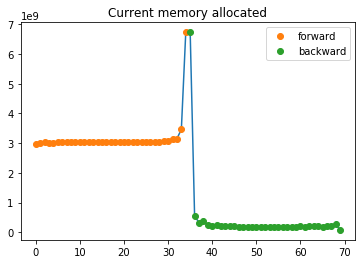

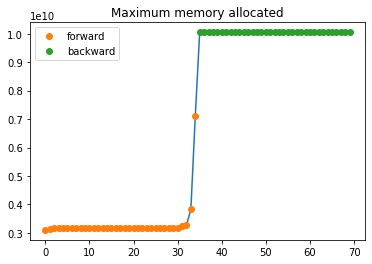

In [7]:
x1, x2 = list(range(len(frev_cur))), list(range(len(frev_cur),len(frev_cur)+len(brev_cur)))
plt.plot(x1+x2,frev_cur + list(reversed(brev_cur)))
plt.plot(x1,frev_cur, 'o', label = 'forward')
plt.plot(x2,list(reversed(brev_cur)), 'o', label = 'backward')
plt.legend()
plt.title('Current memory allocated')
plt.show()


plt.plot(x1+x2,frev_max + list(reversed(brev_max)))
plt.plot(x1,frev_max, 'o', label = 'forward')
plt.plot(x2,list(reversed(brev_max)), 'o', label = 'backward')
plt.legend()
plt.title('Maximum memory allocated')
plt.show()

In [8]:
for i in frev_max:
    print(convert_bytes(i))

2.89 GB
2.91 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
2.94 GB
3.02 GB
3.04 GB
3.56 GB
6.61 GB
